In [ ]:
!pip install lightgbm catboost xgboost seaborn matplotlib scikit-learn pandas

In [93]:
import os
import warnings
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import joblib

In [94]:
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv("data/Student_Performance_Data.csv")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null    object 
 14  Last         493 non-null    float64
 15  Overall      493 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 61.8+ KB


In [97]:
df.head()

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


In [98]:
cols = df.columns.to_list()

for col in cols:
  print(df[col].value_counts())

Department
Computer Science and Engineering               443
English                                         14
Journalism, Communication and Media Studies     13
Political Science                                6
Business Administration                          5
Economics                                        4
Sociology                                        3
Law and Human Rights                             2
Public Health                                    2
Electrical and Electronic Engineering            1
Name: count, dtype: int64
Gender
Male      328
Female    165
Name: count, dtype: int64
HSC
5.00    62
4.50    51
4.00    39
4.17    28
4.25    27
        ..
3.81     1
4.90     1
3.27     1
2.85     1
4.23     1
Name: count, Length: 74, dtype: int64
SSC
5.00    232
4.75     33
4.78     13
4.89     13
4.94     12
       ... 
3.91      1
4.34      1
3.64      1
3.72      1
3.67      1
Name: count, Length: 67, dtype: int64
Income
Lower middle (15,000-30,000)      174
Upper midd

In [99]:
df = df.drop(['Department', 'Last', 'Semester'], axis=1)

In [100]:
df['Income'] = df['Income'].str.strip()

In [ ]:
df.columns

In [101]:
gender_map = {'Male': 0, 'Female': 1}

income_map = {
    'Low (Below 15,000)': 0,
    'Lower middle (15,000-30,000)': 1,
    'Upper middle (30,000-50,000)': 2,
    'High (Above 50,000)': 3
}

hometown_map = {'Village': 0, 'City': 1}

preparation_map = {
    '0-1 Hour': 0,
    '2-3 Hours': 1,
    'More than 3 Hours': 2
}

gaming_map = {
    '0-1 Hour': 0,
    '2-3 Hours': 1,
    'More than 3 Hours': 2
}

attendance_map = {
    'Below 40%': 0,
    '40%-59%': 1,
    '60%-79%': 2,
    '80%-100%': 3
}

job_map = {'No': 0, 'Yes': 1}
extra_map = {'No': 0, 'Yes': 1}


In [102]:
df['Gender'] = df['Gender'].map(gender_map)
df['Income'] = df['Income'].map(income_map)
df['Hometown'] = df['Hometown'].map(hometown_map)
df['Preparation'] = df['Preparation'].map(preparation_map)
df['Gaming'] = df['Gaming'].map(gaming_map)
df['Attendance'] = df['Attendance'].map(attendance_map)
df['Job'] = df['Job'].map(job_map)
df['Extra'] = df['Extra'].map(extra_map)


In [103]:
df.head()

,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Overall
0,0,4.17,4.84,0,0,3,2,0,3,0,3,1,3.350
1,1,4.92,5.00,2,1,3,0,0,3,0,3,1,3.467
2,0,5.00,4.83,1,0,3,0,2,3,0,4,1,3.720
3,0,4.00,4.50,3,1,5,2,2,3,0,5,1,3.750
4,1,2.19,3.17,1,0,3,0,1,3,0,3,1,3.940


In [104]:
def cgpa_class_three(cgpa):
    if cgpa <= 2.75:
        return 0
    elif cgpa <= 3.25:
        return 1
    else:
        return 2

df['Overall_Class'] = df['Overall'].apply(cgpa_class_three)

In [105]:
df['Overall_Class'].value_counts()

Overall_Class
2    251
1    131
0    111
Name: count, dtype: int64

In [106]:
df.drop(['Overall'], axis=1, inplace=True)

In [149]:
df.to_csv('./data/Student_Performance_Data_Preprocessed.csv',index=False)

In [66]:
X = df.drop(['Overall_Class'], axis=1)
y = df['Overall_Class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=56,
    stratify=y
)

In [68]:
scale_cols = ['HSC', 'SSC']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

In [69]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

In [157]:
classification_reports = {}
auc_scores = {}
class_names = ['Low', 'Medium', 'High']
# --- Loop through Models ---

from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 
for name, clf in models.items():
    print(f"\n🔹 Running: {name}")

    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # --- Confusion Matrix ---
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=class_names,
            yticklabels=class_names)
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        
        cm_path = f"visualizations/confusion_matrix/{name}_confusion_matrix.png"
        plt.savefig(cm_path)
        plt.close()
        print(f"Confusion Matrix saved: {cm_path}")

        # --- Classification Report ---
        report = classification_report(y_test, y_pred, output_dict=True)
        classification_reports[name] = report
        print(classification_report(y_test, y_pred))

        # --- Save Classification Report as JSON ---
        report_path = f"classification_reports/{name}_classification_report_wo_sampling.json"
        with open(report_path, 'w') as f:
            json.dump(report, f, indent=4)
        
        print(f"Classification Report saved: {report_path}")

        # --- ROC & AUC ---
        try:
            if hasattr(clf, "predict_proba"):
                y_prob = clf.predict_proba(X_test)

                fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

                for i, class_name in enumerate(class_names):
                    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob[:, i])
                    roc_auc = auc(fpr, tpr)

                    axes[i].plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
                    axes[i].plot([0, 1], [0, 1], linestyle="--", lw=2)
                    axes[i].set_xlim([0.0, 1.0])
                    axes[i].set_ylim([0.0, 1.05])
                    axes[i].set_xlabel("False Positive Rate")
                    axes[i].set_ylabel("True Positive Rate")
                    axes[i].set_title(f"{name} - ROC ({class_name})")
                    axes[i].legend(loc="lower right")

                plt.tight_layout()
                roc_path = f"visualizations/roc_curve/{name}_roc_curve_combined.png"
                plt.savefig(roc_path, dpi=300)
                plt.close()
                print(f"✅ Combined ROC Curve saved: {roc_path}")

            else:
                print(f"Skipped ROC: {name} does not support predict_proba.")
                auc_scores[name] = None

        except Exception as e:
            print(f"Skipped ROC for {name}: {e}")
            auc_scores[name] = None

   
    except Exception as e:
        print(f"{name} failed: {e}")
        classification_reports[name] = None
        auc_scores[name] = None

print("\nAll done!")
print("\nAUC Scores Summary:")
print(auc_scores)


🔹 Running: LogisticRegression


Confusion Matrix saved: visualizations/confusion_matrix/LogisticRegression_confusion_matrix.png
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        22
           1       0.38      0.23      0.29        26
           2       0.75      0.86      0.80        51

    accuracy                           0.64        99
   macro avg       0.55      0.56      0.55        99
weighted avg       0.60      0.64      0.61        99

Classification Report saved: classification_reports/LogisticRegression_classification_report_wo_sampling.json
✅ Combined ROC Curve saved: visualizations/roc_curve/LogisticRegression_roc_curve_combined.png

🔹 Running: RandomForest
Confusion Matrix saved: visualizations/confusion_matrix/RandomForest_confusion_matrix.png
              precision    recall  f1-score   support

           0       0.65      0.50      0.56        22
           1       0.43      0.35      0.38        26
           2       0.75      0.90      0

In [ ]:
X_test_scaled.to_csv('data/X_Test_Preprocessed.csv', index=False)
print(" X_test saved at: data/X_Test_Preprocessed.csv")

 X_test saved at: data/X_Test_Preprocessed.csv


In [152]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_scaled, y_train)


os.makedirs('saved_models', exist_ok=True)
model_path = 'saved_models/GradientBoosting_model.pkl'
joblib.dump(gbc, model_path)

print(f"Gradient Boosting model saved at: {model_path}")

Gradient Boosting model saved at: saved_models/GradientBoosting_model.pkl


In [153]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)


os.makedirs('saved_models', exist_ok=True)
model_path = 'saved_models/RandomForestClassifier_model.pkl'
joblib.dump(rfc, model_path)

print(f"Random Forest Classifier model saved at: {model_path}")

Random Forest Classifier model saved at: saved_models/RandomForestClassifier_model.pkl


In [ ]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

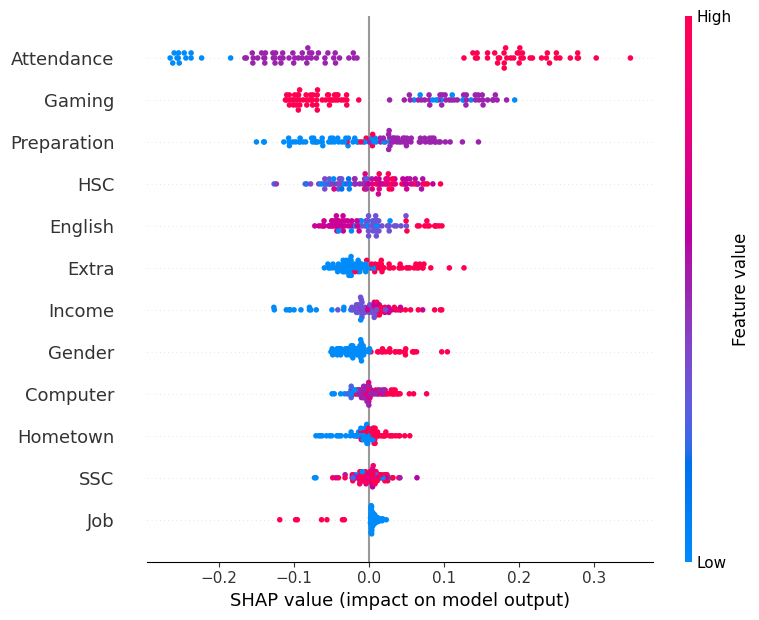

In [ ]:
shap.summary_plot(
    shap_values[:, :, i],
    X_test,
    plot_type="dot"  
)